# Практика № 5

# Задача 1

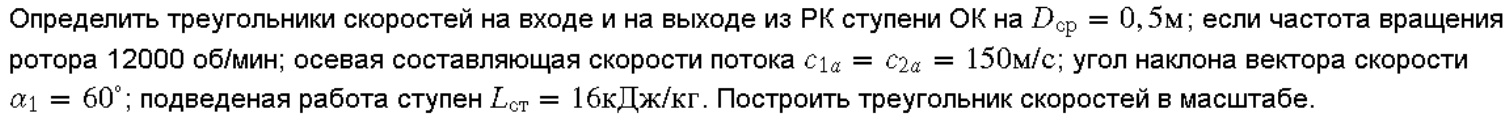

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [2]:
MPa = 1e6
to_kelvin = lambda x: x + 273.15
kJ = 1e3
MW = 1e6

In [199]:
def plot_triangle(
    ax,
    u = None,
    c_a = None,
    c_u = None,
    w_a = None,
    w_u = None,
    **kwargs,
):
    if c_u and c_a:
        ax.plot([0, -c_u], [0, -c_a], label='C_1', color='red', **kwargs)
    if w_u and w_a:
        ax.plot([0, -w_u], [0, -w_a], label='W_1', color='green', **kwargs)
    if (c_u and c_a) or (w_u and w_a):
        if c_u and c_a:
            ax.plot([-c_u, -c_u + u], [-c_a, -c_a], label='u', color='blue', **kwargs)
        else:
            ax.plot([-w_u, -w_u - u], [-w_a, -w_a], label='u', color='blue', **kwargs)
    ax.legend()

In [200]:
average_diameter = 0.5
n = 12000 / 60 # об/c
c_1_a = 150
alpha_1 = 60

stage_work = 16 * kJ

Примем что для газа $R = 287 \frac{Дж}{кг \cdot K}$ и $k = 1.4$

In [201]:
u = np.pi * average_diameter * n
u

314.1592653589793

In [202]:
c_1 = c_1_a / np.sin(np.deg2rad(alpha_1))
c_1

173.20508075688775

In [203]:
c_1_u = c_1 * np.cos(np.deg2rad(alpha_1))
c_1_u

86.60254037844389

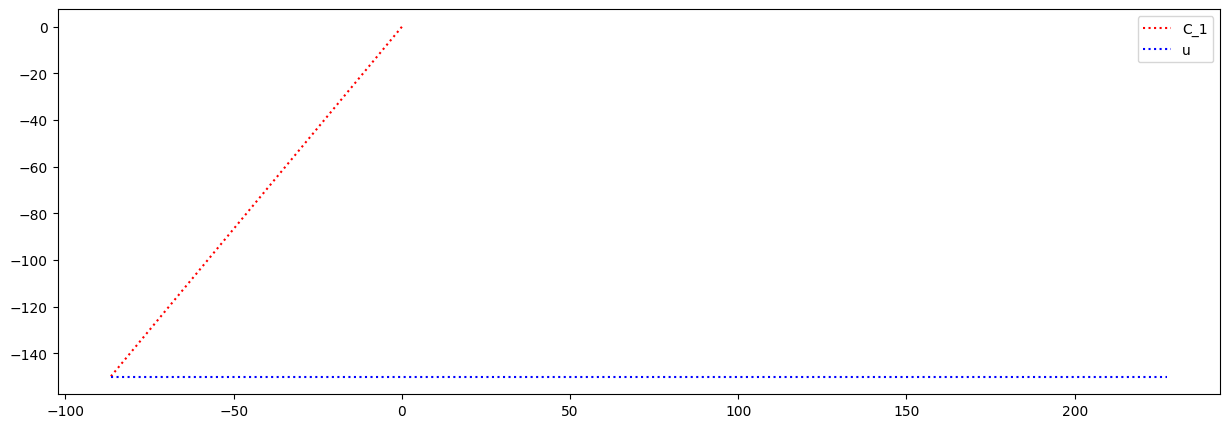

In [204]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, linestyle="dotted")

In [205]:
w_1_u = c_1_u - u
w_1_u

-227.55672498053542

In [206]:
w_1_a = c_1_a
w_1_a

150

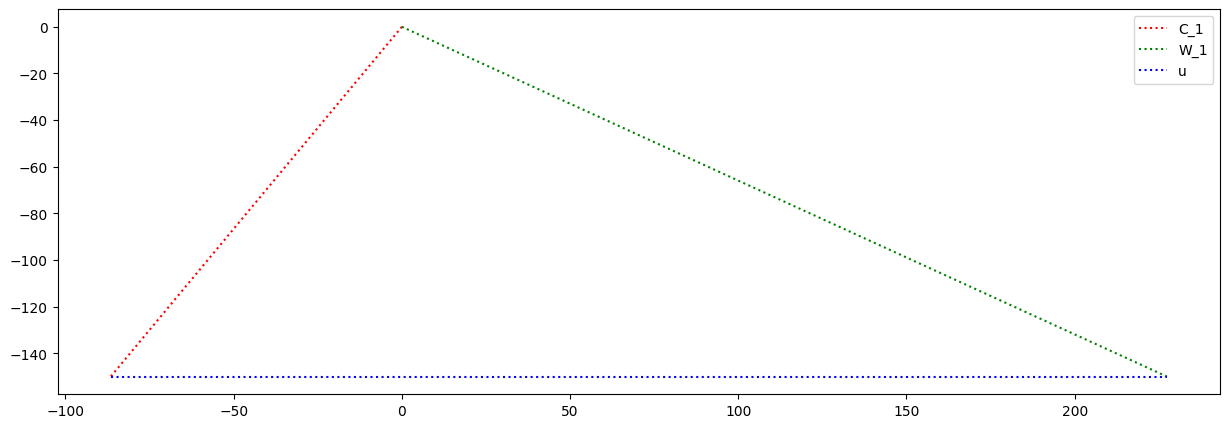

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")

In [208]:
w_1 = (w_1_a ** 2 + w_1_u ** 2) ** 0.5
w_1

272.5473593412107

In [209]:
beta_1 = np.rad2deg(np.arccos(w_1_u / w_1))
beta_1

146.608075701148

In [210]:
delta_w_u = stage_work / u
delta_w_u

50.929581789406505

In [211]:
w_2_u = w_1_u + delta_w_u
w_2_u

-176.6271431911289

In [212]:
w_2_a = c_1_a
w_2_a

150

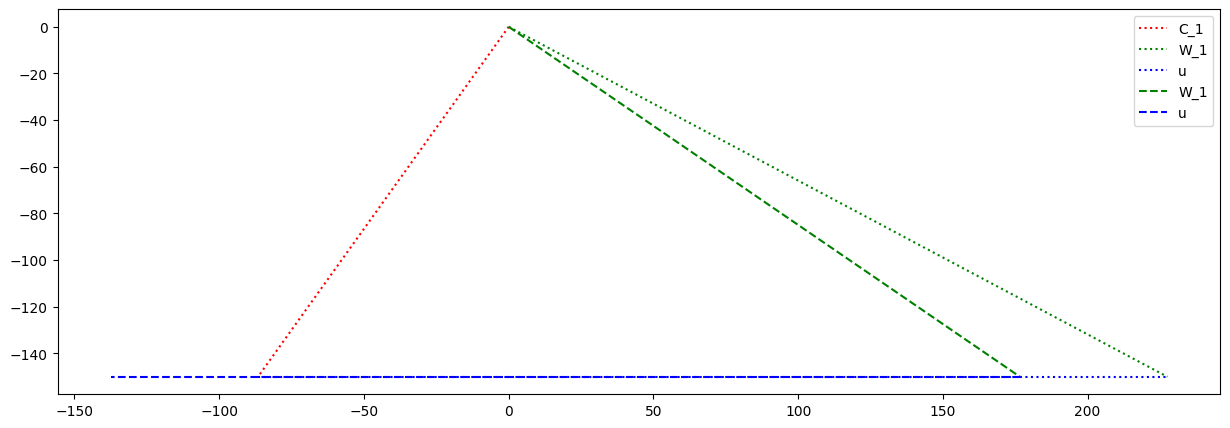

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")
plot_triangle(ax=ax, u=u, w_a=w_2_a, w_u=w_2_u, linestyle="dashed")

In [214]:
w_2 = (w_2_a ** 2 + w_2_u**2) ** 0.5
w_2

231.7264501774874

In [215]:
beta_2 = np.rad2deg(np.arccos(w_2_u / w_2))
beta_2

139.66053335959572

In [216]:
delta_c_u = delta_w_u

In [217]:
c_2_u = c_1_u + delta_c_u
c_2_u

137.5321221678504

In [218]:
c_2_a = c_1_a
c_2_a

150

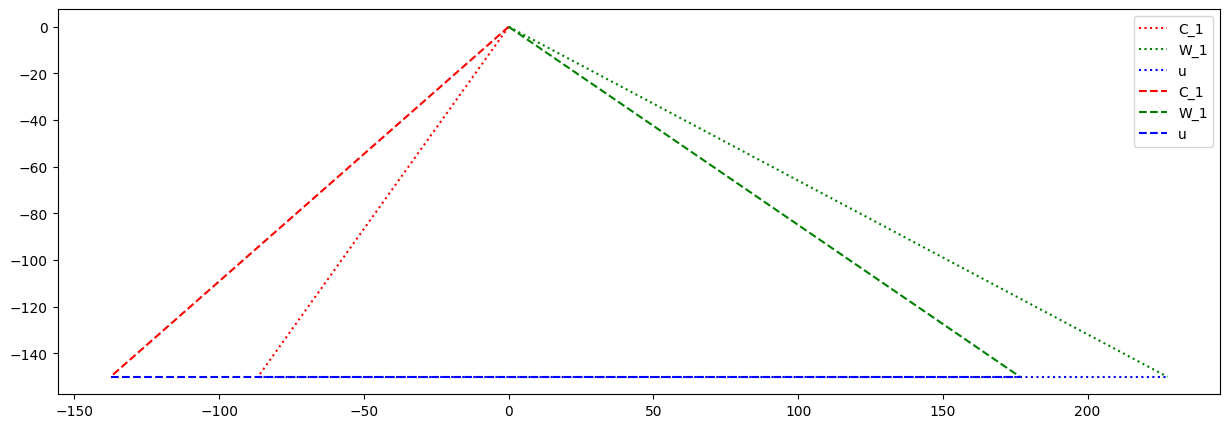

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")
plot_triangle(ax=ax, u=u, w_a=w_2_a, w_u=w_2_u, c_a=c_2_a, c_u=c_2_u, linestyle="dashed")

In [220]:
c_2 = (c_2_u ** 2 + c_2_a ** 2) ** 0.5
c_2

203.5069645687649

In [221]:
alpha_2 = np.rad2deg(np.arcsin(c_2_a / c_2))
alpha_2

47.48288628953231

In [222]:
table = pd.DataFrame({
    "absolute_speed": [c_1, c_2],
    "absolute_angle": [alpha_1, alpha_2],
    "relative_speed": [w_1, w_2],
    "relative_angle": [beta_1, beta_2],
    "triangle": ["inlet", "outlet"],
}).set_index("triangle")

# Ответ:

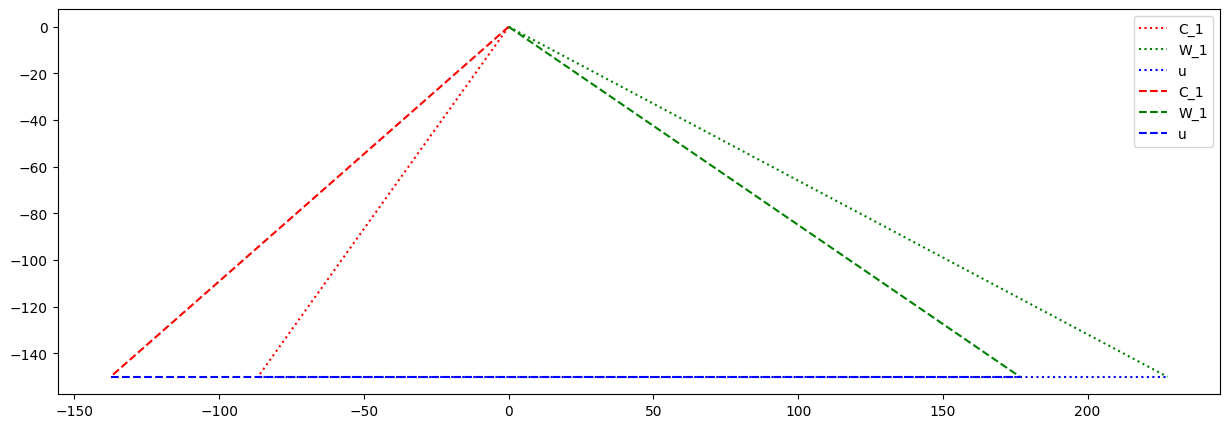

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c_1_u, c_a=c_1_a, w_a=w_1_a, w_u=w_1_u, linestyle="dotted")
plot_triangle(ax=ax, u=u, w_a=w_2_a, w_u=w_2_u, c_a=c_2_a, c_u=c_2_u, linestyle="dashed")

In [224]:
table

,absolute_speed,absolute_angle,relative_speed,relative_angle
triangle,,,,
inlet,173.205081,60.000000,272.547359,146.608076
outlet,203.506965,47.482886,231.726450,139.660533


# Задача №2

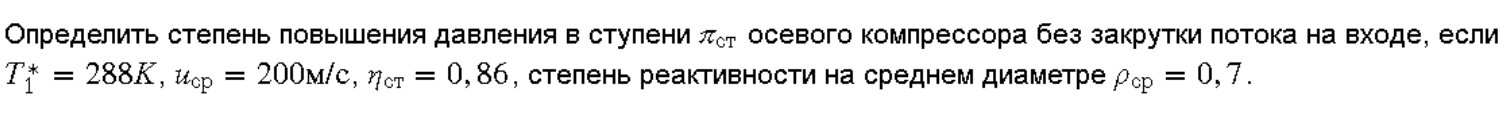

In [254]:
T_1 = 288
u=200
compressor_efficiency = 0.86
degree_of_reactive = 0.7

Из условия, $c_{1u} = 0$ - закрутки потока нет на входе в рабочие лопатки

In [ ]:
c_1_u = 0

$$\rho = 1 - \frac{c_{1u}}{u} - \frac{\Delta c_u}{2u}$$
$$c_{1u} = 0$$
$$1 - \rho = \frac{\Delta c_u}{2u}$$
$$\Delta c_u = 2u(1-\rho)$$

In [256]:
delta_c_u = 2 * u * (1 - degree_of_reactive)
delta_c_u

120.00000000000001

$$L_{ступени} = u \Delta c_u$$

In [258]:
stage_work = u * delta_c_u
stage_work

24000.000000000004

$$L_{ступени\space изоэнтропийное} = u \Delta c_u \eta_{компрессора} = L_{ступени} \eta_{компрессора}$$

In [260]:
stage_work_isentropic = stage_work * compressor_efficiency

## Для воздуха из практики №3

$$Cp(T)/R = a_1 * T^{-2} + a_2 * T^{-1} + a_3 + a_4 * T + a_5 * T^2 + a_6 * T^3 + a_7 * T^4$$

1.009950160e4,-1.968275610e2, 5.009155110, -5.761013730e-3, 1.066859930e-5, -7.940297970e-9, 2.185231910e-12


А так же зададимся для воздуха R=287, k = 1.4

In [288]:
R = 287
k = 1.4

def cp(T, R):
    a = np.array([1.009950160e4,-1.968275610e2, 5.009155110, -5.761013730e-3, 1.066859930e-5, -7.940297970e-9, 2.185231910e-12])
    t = np.array([T ** -2, T ** -1, 1, T, T ** 2, T ** 3, T ** 4])
    return (a * t).sum() * R

In [289]:
h_1 = cp(T_1, R=R) * T_1

In [290]:
h_2 = h_1 + stage_work_isentropic

In [279]:
def find_t(h, R):
    def error(t, h, R):
        return (cp(t, R) * t - h) ** 2
    
    result = minimize(error, x0=500, args=(h, R))
    return result.x

In [291]:
T_2 = find_t(h=h_2, R=R)[0]
T_2

/tmp/ipykernel_11559/3466958314.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t = np.array([T ** -2, T ** -1, 1, T, T ** 2, T ** 3, T ** 4])
/tmp/ipykernel_11559/3466958314.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t = np.array([T ** -2, T ** -1, 1, T, T ** 2, T ** 3, T ** 4])


308.2576923984512

In [286]:
tau = T_1 / T_2
tau

0.9342832542447431

In [293]:
inverse_pressure_rise = tau ** (k / (k - 1))
inverse_pressure_rise

0.7882699605110006

In [295]:
pressure_rise = 1 / inverse_pressure_rise
pressure_rise

1.268600923662934

# Ответ:

In [296]:
pressure_rise

1.268600923662934